# Baynes Sound
# May 30, 2017

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from salishsea_tools import (nc_tools, geo_tools, tidetools) 
import netCDF4 as nc

In [4]:
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')

In [5]:
Bathy, lon, lats = tidetools.get_bathy_data(grid)

In [6]:
geo_tools.find_closest_model_point( -124.74465,49.4616, lon, lats, land_mask = Bathy.mask)

(599, 125)

# Hindcast

In [93]:
Jun_data = glob.glob('/results/SalishSea/hindcast/3*jun15/SalishSea_1h*grid_T.nc')
Jun_data

['/results/SalishSea/hindcast/30jun15/SalishSea_1h_20150630_20150630_grid_T.nc']

In [7]:
ordered = ['/results/SalishSea/hindcast/01jun15/SalishSea_1h_20150601_20150601_grid_T.nc',
          '/results/SalishSea/hindcast/02jun15/SalishSea_1h_20150602_20150602_grid_T.nc',
          '/results/SalishSea/hindcast/03jun15/SalishSea_1h_20150603_20150603_grid_T.nc',
          '/results/SalishSea/hindcast/04jun15/SalishSea_1h_20150604_20150604_grid_T.nc',
          '/results/SalishSea/hindcast/05jun15/SalishSea_1h_20150605_20150605_grid_T.nc',
          '/results/SalishSea/hindcast/06jun15/SalishSea_1h_20150606_20150606_grid_T.nc',
          '/results/SalishSea/hindcast/07jun15/SalishSea_1h_20150607_20150607_grid_T.nc',
          '/results/SalishSea/hindcast/08jun15/SalishSea_1h_20150608_20150608_grid_T.nc',
          '/results/SalishSea/hindcast/09jun15/SalishSea_1h_20150609_20150609_grid_T.nc',
          '/results/SalishSea/hindcast/10jun15/SalishSea_1h_20150610_20150610_grid_T.nc',
          '/results/SalishSea/hindcast/11jun15/SalishSea_1h_20150611_20150611_grid_T.nc',
          '/results/SalishSea/hindcast/12jun15/SalishSea_1h_20150612_20150612_grid_T.nc',
          '/results/SalishSea/hindcast/13jun15/SalishSea_1h_20150613_20150613_grid_T.nc',
          '/results/SalishSea/hindcast/14jun15/SalishSea_1h_20150614_20150614_grid_T.nc',
          '/results/SalishSea/hindcast/15jun15/SalishSea_1h_20150615_20150615_grid_T.nc',
          '/results/SalishSea/hindcast/16jun15/SalishSea_1h_20150616_20150616_grid_T.nc',
          '/results/SalishSea/hindcast/17jun15/SalishSea_1h_20150617_20150617_grid_T.nc',
          '/results/SalishSea/hindcast/18jun15/SalishSea_1h_20150618_20150618_grid_T.nc',
          '/results/SalishSea/hindcast/19jun15/SalishSea_1h_20150619_20150619_grid_T.nc',
          '/results/SalishSea/hindcast/20jun15/SalishSea_1h_20150620_20150620_grid_T.nc',
          '/results/SalishSea/hindcast/21jun15/SalishSea_1h_20150621_20150621_grid_T.nc',
          '/results/SalishSea/hindcast/22jun15/SalishSea_1h_20150622_20150622_grid_T.nc',
          '/results/SalishSea/hindcast/23jun15/SalishSea_1h_20150623_20150623_grid_T.nc',
          '/results/SalishSea/hindcast/24jun15/SalishSea_1h_20150624_20150624_grid_T.nc',
          '/results/SalishSea/hindcast/25jun15/SalishSea_1h_20150625_20150625_grid_T.nc',
          '/results/SalishSea/hindcast/26jun15/SalishSea_1h_20150626_20150626_grid_T.nc',
          '/results/SalishSea/hindcast/27jun15/SalishSea_1h_20150627_20150627_grid_T.nc',
          '/results/SalishSea/hindcast/28jun15/SalishSea_1h_20150628_20150628_grid_T.nc',
          '/results/SalishSea/hindcast/29jun15/SalishSea_1h_20150629_20150629_grid_T.nc',
          '/results/SalishSea/hindcast/30jun15/SalishSea_1h_20150630_20150630_grid_T.nc']

with nc_tools.scDataset(ordered) as f:
    t = f.variables['votemper'][:,:,599,125]
    print(t.shape)

(720, 40)


In [128]:
excluding_zeros = t[:,0:12:1]

In [8]:
with nc_tools.scDataset(ordered) as f:
    s = f.variables['vosaline'][:,:,599,125]
    print(s.shape)

(720, 40)


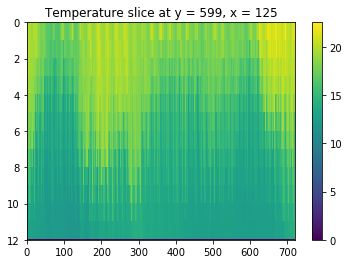

In [32]:
fig,ax = plt.subplots(1,1)
mesh = ax.pcolormesh(t.T)
fig.colorbar(mesh)
ax.set_ylim((12,0))
plt.title('Temperature slice at y = 599, x = 125')

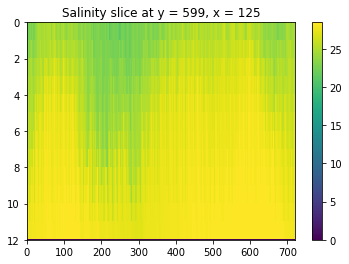

In [33]:
fig,ax = plt.subplots(1,1)
mesh = ax.pcolormesh(s.T)
fig.colorbar(mesh)
ax.set_ylim((12,0))
plt.title('Salinity slice at y = 599, x = 125')

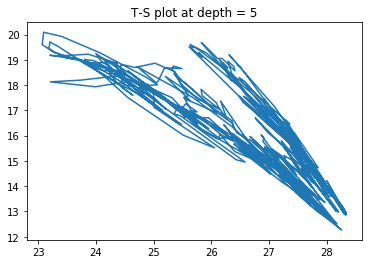

In [34]:
plt.plot(s[:,5],t[:,5]);
plt.title('T-S plot at depth = 5')

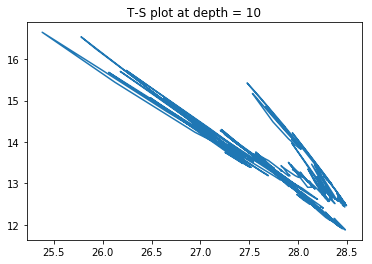

In [35]:
plt.plot(s[:,10],t[:,10]);
plt.title('T-S plot at depth = 10')

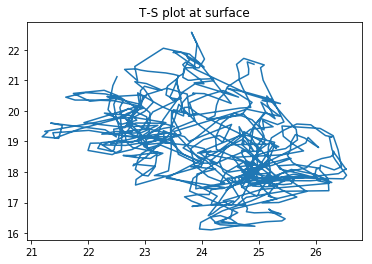

In [36]:
plt.plot(s[:,0],t[:,0]);
plt.title('T-S plot at surface')

# B02

In [19]:
B02 = glob.glob('/data/vdo/MEOPAR/completed-runs/B02/*1h*grid_T.nc')

In [18]:
B02

['/data/vdo/MEOPAR/completed-runs/B02/1_SalishSea_1h_20150308_20150318_grid_T.nc',
 '/data/vdo/MEOPAR/completed-runs/B02/SalishSea_1h_20150308_20150318_grid_T.nc']

In [25]:
B02_big = nc.Dataset('/data/vdo/MEOPAR/completed-runs/B02/SalishSea_1h_20150308_20150318_grid_T.nc')
B02_big

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    name: SalishSea_1h_20150308_20150318
    description: ocean T grid variables
    title: ocean T grid variables
    Conventions: CF-1.6
    timeStamp: 2017-Jun-02 14:30:21 GMT
    uuid: 327c16b2-79e5-4d73-b494-31d9ac699366
    dimensions(sizes): axis_nbounds(2), x(398), y(898), nvertex(4), deptht(40), time_counter(240)
    variables(dimensions): float32 nav_lat(y,x), float32 nav_lon(y,x), float32 bounds_lon(y,x,nvertex), float32 bounds_lat(y,x,nvertex), float32 area(y,x), float32 deptht(deptht), float32 deptht_bounds(deptht,axis_nbounds), float32 sossheig(time_counter,y,x), float64 time_centered(time_counter), float64 time_centered_bounds(time_counter,axis_nbounds), float64 time_counter(time_counter), float64 time_counter_bounds(time_counter,axis_nbounds), float32 votemper(time_counter,deptht,y,x), float32 vosaline(time_counter,deptht,y,x)
    groups: 

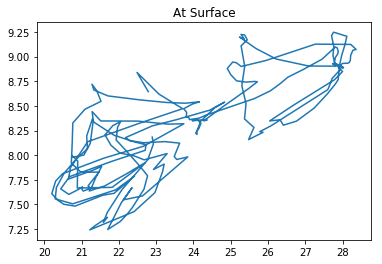

In [29]:
plt.plot(B02_big.variables['vosaline'][:,0,599,125],B02_big.variables['votemper'][:,0,599,125])
plt.title('At Surface')

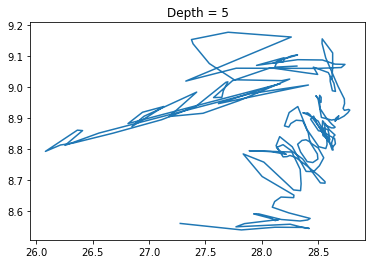

In [30]:
plt.plot(B02_big.variables['vosaline'][:,5,599,125],B02_big.variables['votemper'][:,5,599,125])
plt.title('Depth = 5')

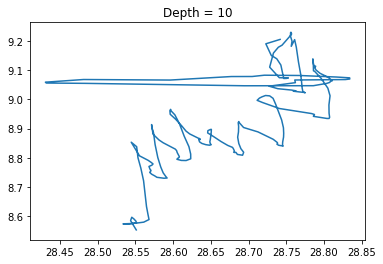

In [31]:
plt.plot(B02_big.variables['vosaline'][:,10,599,125],B02_big.variables['votemper'][:,10,599,125])
plt.title('Depth = 10')

ValueError: x and y must have same first dimension, but have shapes (1,) and (240, 40, 898, 398)

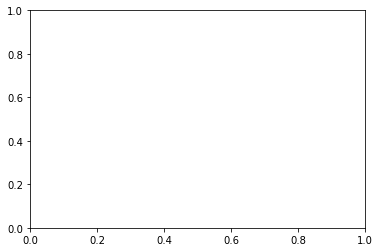

In [40]:
plt.plot(B02_big.dimensions['deptht'], B02_big.variables['vosaline'])

In [50]:
B02_big.dimensions['deptht']

<class 'netCDF4._netCDF4.Dimension'>: name = 'deptht', size = 40

In [51]:
B02_big.variables['vosaline']

<class 'netCDF4._netCDF4.Variable'>
float32 vosaline(time_counter, deptht, y, x)
    standard_name: sea_water_reference_salinity
    long_name: salinity
    units: g kg-1
    online_operation: average
    interval_operation: 40 s
    interval_write: 1 h
    cell_methods: time: mean (interval: 40 s)
    cell_measures: area: area
    _FillValue: 1e+20
    missing_value: 1e+20
    coordinates: time_centered deptht nav_lat nav_lon
unlimited dimensions: time_counter
current shape = (240, 40, 898, 398)
filling on

In [52]:
B02_bigx = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/B02/SalishSea_1h_20150308_20150318_grid_T.nc')

In [64]:
B02_bigx.deptht.values[15:22:1]

array([ 15.63428783,  16.76117325,  18.00713539,  19.48178482,
        21.38997841,  24.10025597,  28.22991562], dtype=float32)

In [69]:
B02_bigx.isel(x=125,y=599,deptht=slice(15,22)).vosaline

<xarray.DataArray 'vosaline' (time_counter: 240, deptht: 7)>
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])
Coordinates:
    nav_lat        float32 49.4607
    nav_lon        float32 -124.745
  * deptht         (deptht) float32 15.6343 16.7612 18.0071 19.4818 21.39 ...
    time_centered  (time_counter) datetime64[ns] 2015-03-08T00:30:00 ...
  * time_counter   (time_counter) datetime64[ns] 2015-03-08T00:30:00 ...
Attributes:
    standard_name:       sea_water_reference_salinity
    long_name:           salinity
    units:               g kg-1
    online_operation:    average
    interval_operation:  40 s
    interval_write:      1 h
    cell_methods:        time: mean (interval: 40 s)
    cell_measures:       area: area

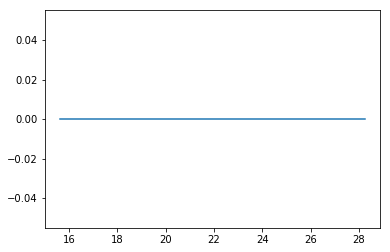

In [70]:
plt.plot(B02_bigx.deptht.values[15:22:1], B02_bigx.isel(x=125,y=599,deptht=slice(15,22),time_counter=100).vosaline)

In [75]:
B02_bigx.isel(x=125,y=599,deptht=slice(15,22),time_counter=150).vosaline.values

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.])